In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import functions
import glob as glob
import cartopy.crs as ccrs
import matplotlib as mpl

In [2]:
fbkdir = '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/feedbacks/'
tempdir = '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/feedback_input/'

In [3]:
cldtype = 'ALL'
experiments = ['abrupt-0_5xCO2', 'abrupt-2xCO2', 'abrupt-4xCO2']
ds_list = []
dT_list = []
dT_annavg_list = []

interval=30
if interval == 30:
    tslicelist = [slice('1920-01-01', '1949-12-31'), slice('1950-01-01', '1979-12-31'),
                slice('1980-01-01', '2009-12-31'), slice('2010-01-01', '2039-12-31'),
                slice('2040-01-01', '2069-12-31')]
elif interval == 15:
    tslicelist = [slice('1920-01-01', '1934-12-31'), slice('1935-01-01', '1949-12-31'),
                slice('1950-01-01', '1964-12-31'), slice('1965-01-01', '1979-12-31'),
                slice('1980-01-01', '1994-12-31'), slice('1995-01-01', '2009-12-31'),
                slice('2010-01-01', '2024-12-31'), slice('2025-01-01', '2039-12-31'),
                slice('2040-01-01', '2054-12-31'), slice('2055-01-01', '2069-12-31')]
elif interval == 10:
    tslicelist = [slice('1920-01', '1929-12'), slice('1930-01-01', '1939-12-31'),
                slice('1940-01-01', '1949-12-31'), slice('1950-01-01', '1959-12-31'),
                slice('1960-01-01', '1969-12-31'), slice('1970-01-01', '1979-12-31'),
                slice('1980-01-01', '1989-12-31'), slice('1990-01-01', '1999-12-31'),
                slice('2000-01-01', '2009-12-31'), slice('2010-01-01', '2019-12-31'),
                slice('2020-01-01', '2029-12-31'), slice('2030-01-01', '2039-12-31'),
                slice('2040-01-01', '2049-12-31'), slice('2050-01-01', '2059-12-31'),
                slice('2060-01-01', '2069-12-31')]
N = int(150/interval)

pi_temp = xr.open_dataset(tempdir+'tas_piClim_final30years.nc')
pi_temp = pi_temp.groupby('time.month').mean('time')
pi_temp = pi_temp.rename({'month':'time'})
pi_temp_annavg = pi_temp.mean('time')

for exp in experiments:

    fbk_files = glob.glob(fbkdir+'interval'+str(interval)+'/'+cldtype+'_'+exp+'_*')
    fbk_files.sort()
    fbk_ds = xr.open_mfdataset(fbk_files, combine='nested', concat_dim='period')
    ds_list.append(fbk_ds)

    temp_ds = xr.open_dataset(tempdir+'tas_'+exp+'_1920-01-01_2069-12-31.nc')

    temp_annavg = temp_ds.groupby('time.year').mean('time')
    temp_annavg['tas'] = temp_annavg['tas'] - pi_temp_annavg['tas']
    dT_annavg_list.append(temp_annavg)
    
    dT = []
    for tslice in tslicelist:
        temp_slice = temp_ds.sel(time=tslice)
        temp_slice = temp_slice.groupby('time.month').mean('time')
        temp_slice = temp_slice.rename({'month':'time'})
        temp_slice['tas'] = temp_slice['tas'] - pi_temp['tas']
        dT.append(temp_slice)

    dT = xr.concat(dT, dim='period')
    dT_list.append(dT)


ds = xr.concat(ds_list, dim='co2_conc')
ds = ds.assign_coords({'period':np.arange(N)*interval})
ds = ds.assign_coords({'co2_conc':['0.5xCO2', '2xCO2', '4xCO2']})

ds_dT = xr.concat(dT_list, dim='co2_conc')
ds_dT = ds_dT.assign_coords({'period':np.arange(N)*interval})
ds_dT = ds_dT.assign_coords({'co2_conc':['0.5xCO2', '2xCO2', '4xCO2']})

ds_dT_annavg = xr.concat(dT_annavg_list, dim='co2_conc')

In [7]:
clouddir = '/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/other_cloud_vars/'
tempdir = '/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/feedback_input/'
var_list = ['CLDTOT','TGCLDLWP']

In [8]:
# Prepare piClim experiments
exp = 'piClim'
tslice = slice('2040-01-01', '2069-12-31')

pi_temp = xr.open_dataset(tempdir+'tas_piClim_final30years.nc')
pi_temp = functions.computeWeightedMean(pi_temp.mean('time'))
pi_temp = float(pi_temp['tas'].values)

cloud_files = []
for var in var_list: cloud_files.append(clouddir+var+'_'+exp+'.nc')
cloud_files.sort()
print(cloud_files)
cloud_ds = xr.open_mfdataset(cloud_files)

cloud_slice = cloud_ds.sel(time=tslice)
piClim_cloud = cloud_slice.groupby('time.month').mean('time')
piClim_cloud = piClim_cloud.rename({'month':'time'})

['/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/other_cloud_vars/CLDTOT_piClim.nc', '/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/other_cloud_vars/TGCLDLWP_piClim.nc']


In [9]:
experiments = ['abrupt-0_5xCO2', 'abrupt-2xCO2', 'abrupt-4xCO2']
interval = 30
ds_list = []
dT_list = []

interval=30
if interval == 30:
    tslicelist = [slice('1920-01-01', '1949-12-31'), slice('1950-01-01', '1979-12-31'),
                slice('1980-01-01', '2009-12-31'), slice('2010-01-01', '2039-12-31'),
                slice('2040-01-01', '2069-12-31')]
elif interval==15:
    tslicelist = [slice('1920-01-01', '1934-12-31'), slice('1935-01-01', '1949-12-31'),
                slice('1950-01-01', '1964-12-31'), slice('1965-01-01', '1979-12-31'),
                slice('1980-01-01', '1994-12-31'), slice('1995-01-01', '2009-12-31'),
                slice('2010-01-01', '2024-12-31'), slice('2025-01-01', '2039-12-31'),
                slice('2040-01-01', '2054-12-31'), slice('2055-01-01', '2069-12-31')]
elif interval==10:
    tslicelist = [slice('1920-01', '1929-12'), slice('1930-01-01', '1939-12-31'),
            slice('1940-01-01', '1949-12-31'), slice('1950-01-01', '1959-12-31'),
            slice('1960-01-01', '1969-12-31'), slice('1970-01-01', '1979-12-31'),
            slice('1980-01-01', '1989-12-31'), slice('1990-01-01', '1999-12-31'),
            slice('2000-01-01', '2009-12-31'), slice('2010-01-01', '2019-12-31'),
            slice('2020-01-01', '2029-12-31'), slice('2030-01-01', '2039-12-31'),
            slice('2040-01-01', '2049-12-31'), slice('2050-01-01', '2059-12-31'),
            slice('2060-01-01', '2069-12-31')]
N = int(150/interval)

pi_temp = xr.open_dataset(tempdir+'tas_piClim_final30years.nc')
pi_temp = pi_temp.groupby('time.month').mean('time')
pi_temp = pi_temp.rename({'month':'time'})
pi_temp_annavg = pi_temp.mean('time')

for exp in experiments:
    cloud_files = []
    for var in var_list: cloud_files.append(clouddir+var+'_'+exp+'.nc')
    cloud_files.sort()
    cloud_ds = xr.open_mfdataset(cloud_files)

    temp_ds = xr.open_dataset(tempdir+'tas_'+exp+'_1920-01-01_2069-12-31.nc')
    
    dT = []
    cloud_list = []
    for tslice in tslicelist:
        cloud_slice = cloud_ds.sel(time=tslice)
        cloud_slice = cloud_slice.groupby('time.month').mean('time')
        cloud_slice = cloud_slice.rename({'month':'time'})
        cloud_list.append(cloud_slice)


        temp_slice = temp_ds.sel(time=tslice)
        temp_slice = temp_slice.groupby('time.month').mean('time')
        temp_slice = temp_slice.rename({'month':'time'})
        temp_slice['tas'] = temp_slice['tas'] - pi_temp['tas']
        dT.append(temp_slice)
    
    ds_cloud = xr.concat(cloud_list, dim='period')
    ds_list.append(ds_cloud)

    dT = xr.concat(dT, dim='period')
    dT_list.append(dT)

ds_cloud = xr.concat(ds_list, dim='co2_conc')
ds_cloud = ds_cloud.assign_coords({'period':np.arange(N)*interval})
ds_cloud = ds_cloud.assign_coords({'co2_conc':['0.5xCO2', '2xCO2', '4xCO2']})


ds_dT_cloud = xr.concat(dT_list, dim='co2_conc')
ds_dT_cloud = ds_dT_cloud.assign_coords({'period':np.arange(N)*interval})
ds_dT_cloud = ds_dT_cloud.assign_coords({'co2_conc':['0.5xCO2', '2xCO2', '4xCO2']})

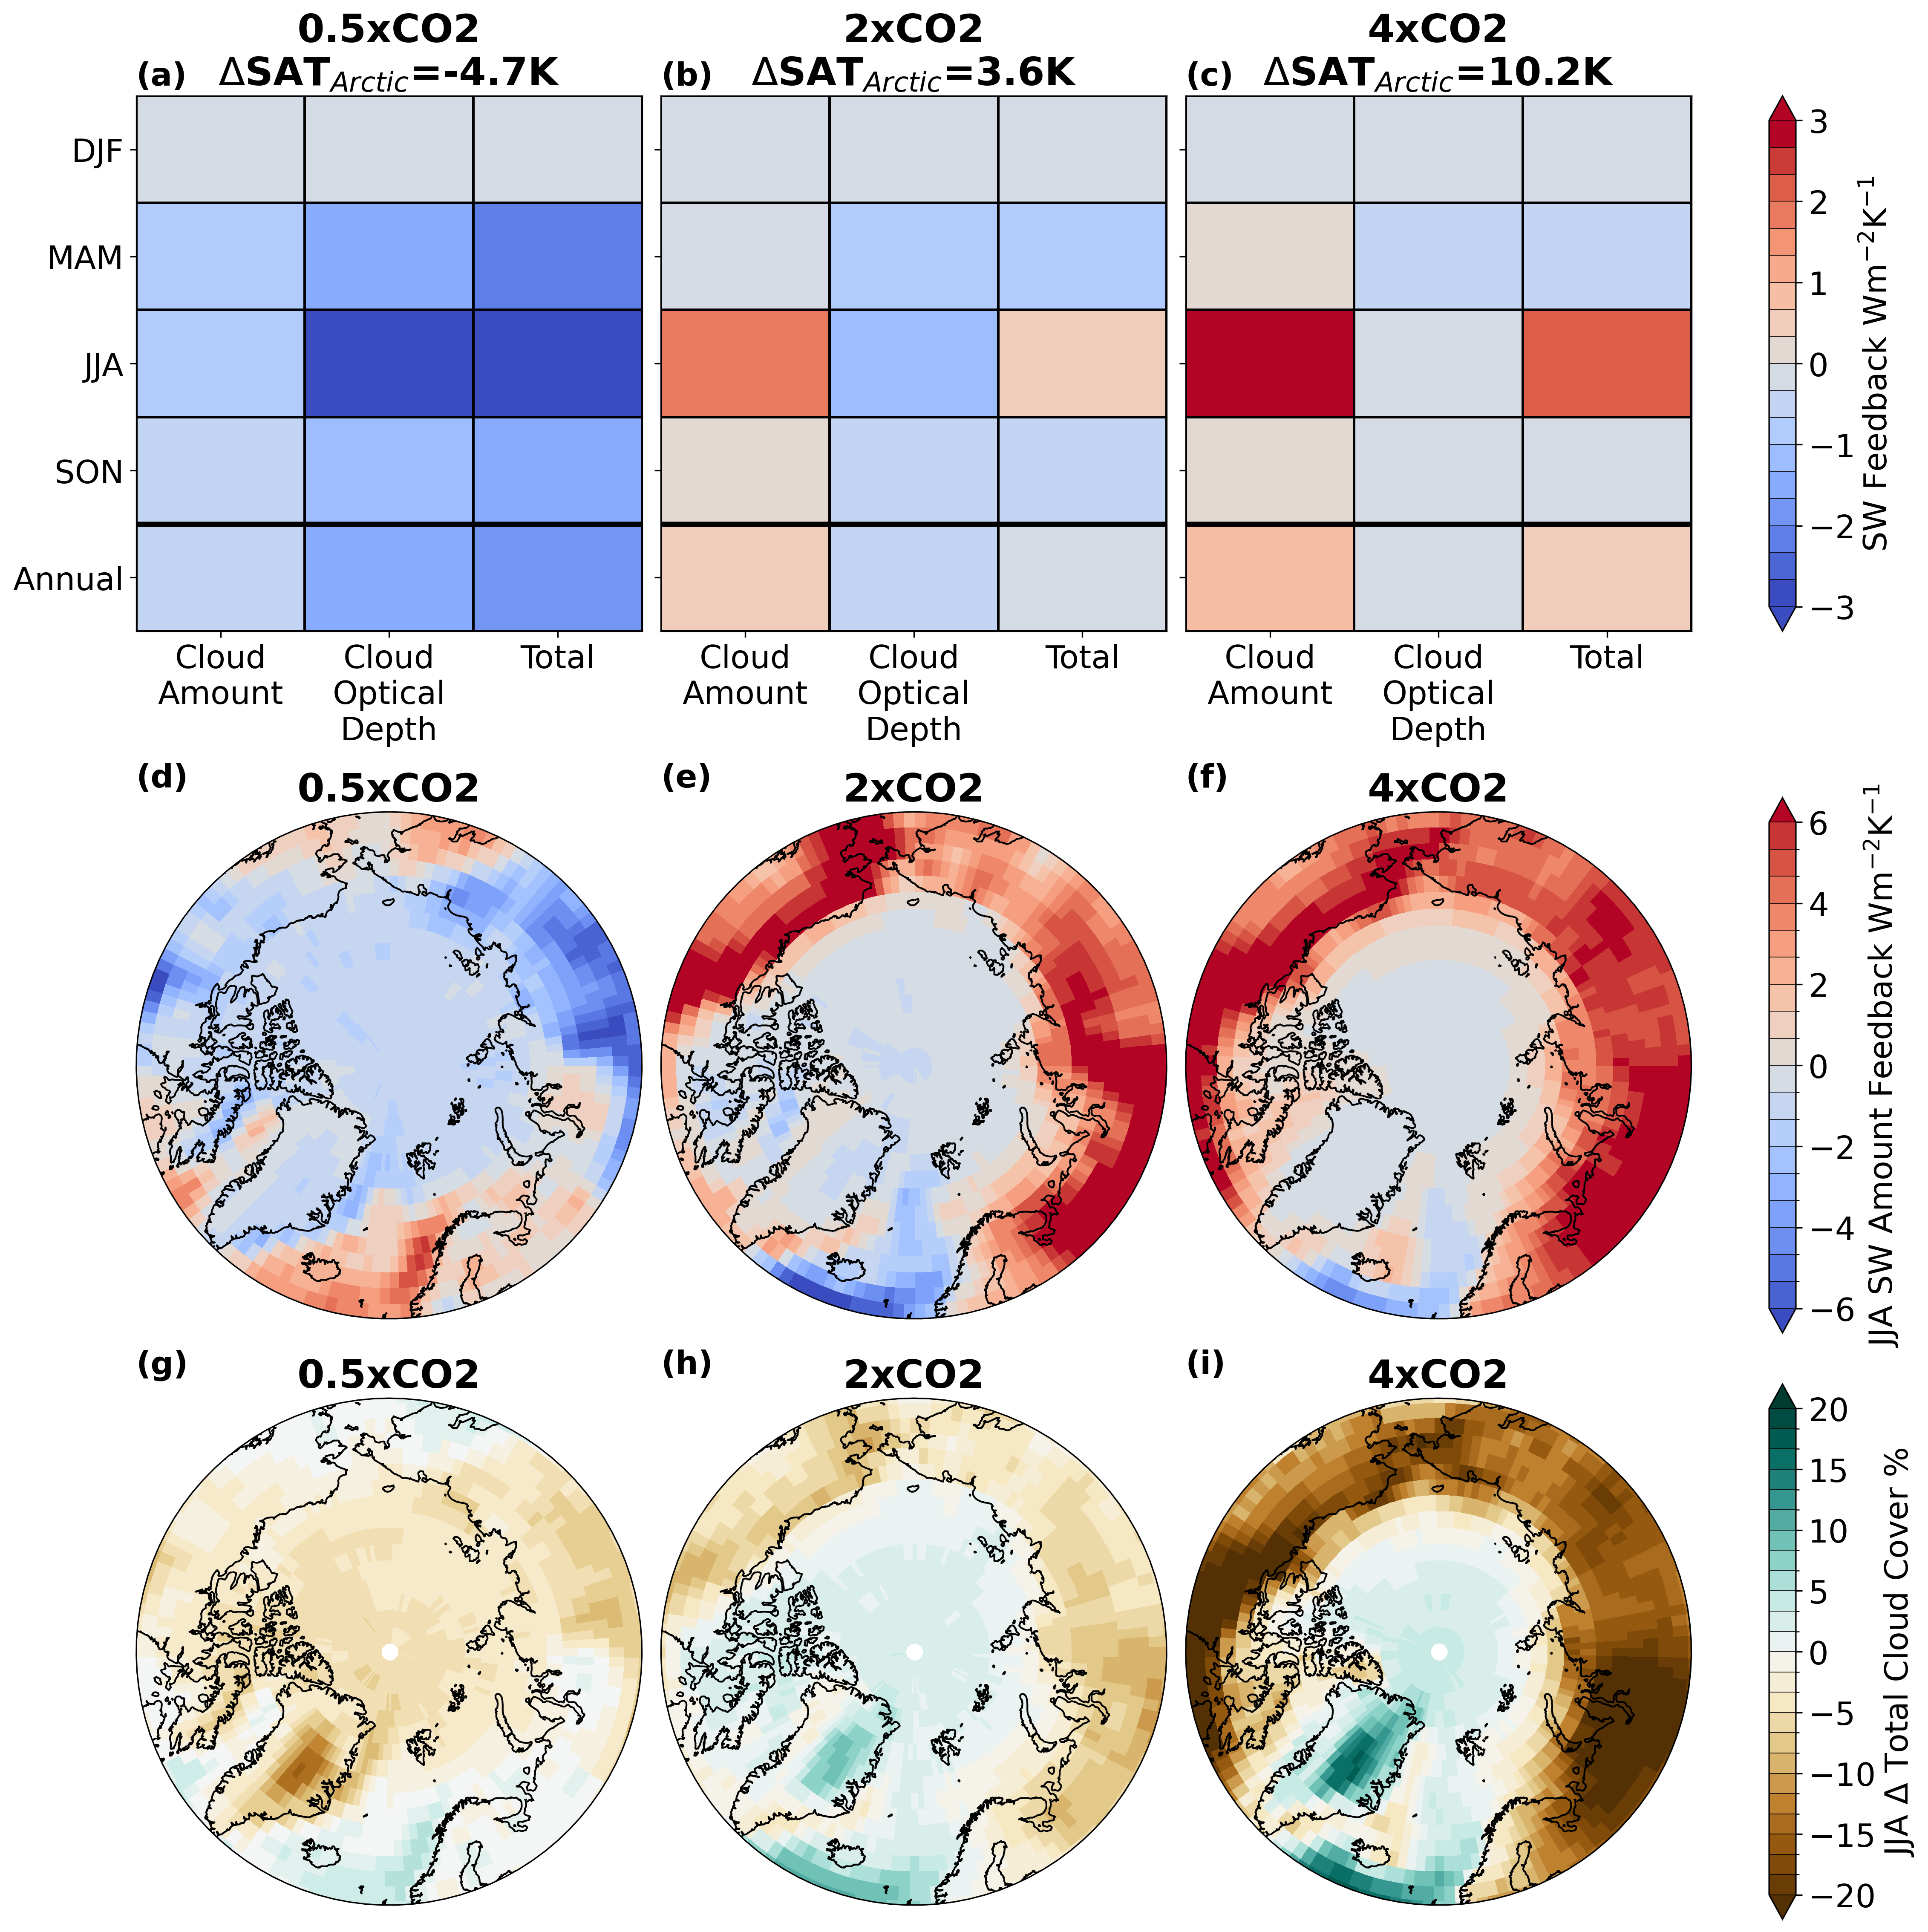

In [7]:
Arctic_limit = 60
period = 120

seasons = ['DJF','MAM','JJA','SON']
components = ['SWcld_amt', 'SWcld_tau','SWcld_tot']; component_names = ['Cloud\nAmount','Cloud\nOptical\nDepth', 'Total']

labels = [['(a)','(b)','(c)'],['(d)','(e)','(f)'], ['(g)','(h)','(i)']]

# Choose subset of feedback variables, while selecting period of interest
var_list = []
for comp in components:
      var_list.append(ds[comp].sel(period=period)) 
feedbacks = xr.merge(var_list)

# Compute seasonal means and annual average
feedbacks_t_avg = [] # for feedbacks
cloud_t_avg = [] # for cloud cover
cloud_piClim_t_avg = [] # for pre-industrial cloud cover
temp_t_avg = [] # for temperature

feedbacks_seasons = feedbacks.groupby('time.season').mean('time')
for season in seasons:
    cloud_i = functions.computeSeasonalMean(ds_cloud.sel(period=period),season=season)
    cloud_piClim_i = functions.computeSeasonalMean(piClim_cloud,season=season)
    dT_i = functions.computeSeasonalMean(ds_dT.sel(period=period),season=season)

    feedbacks_t_avg.append(feedbacks_seasons.sel(season=season).drop_vars('season'))
    cloud_t_avg.append(cloud_i)
    cloud_piClim_t_avg.append(cloud_piClim_i)
    temp_t_avg.append(dT_i)
feedbacks_t_avg.append(feedbacks.mean('time'))
cloud_t_avg.append(ds_cloud.sel(period=period).mean('time'))
cloud_piClim_t_avg.append(piClim_cloud.mean('time'))
temp_t_avg.append(ds_dT.sel(period=period).mean('time'))

feedbacks_t_avg = xr.concat(feedbacks_t_avg,dim='time')
feedbacks_t_avg = feedbacks_t_avg.assign_coords({'time':seasons+['Annual']})

cloud_t_avg = xr.concat(cloud_t_avg,dim='time')
cloud_t_avg = cloud_t_avg.assign_coords({'time':seasons+['Annual']})

cloud_piClim_t_avg = xr.concat(cloud_piClim_t_avg,dim='time')
cloud_piClim_t_avg = cloud_piClim_t_avg.assign_coords({'time':seasons+['Annual']})

temp_t_avg = xr.concat(temp_t_avg,dim='time')
temp_t_avg = temp_t_avg.assign_coords({'time':seasons+['Annual']})

# Compute Arctic spatial averages
feedbacks_Arctic = functions.computeWeightedMean(feedbacks_t_avg.sel(lat=slice(Arctic_limit, 90)))
temp_Arctic = functions.computeWeightedMean(temp_t_avg.sel(lat=slice(Arctic_limit, 90)))

# Create figure
fig, axs = plt.subplot_mosaic(mosaic=labels, figsize=(15, 15),dpi=300,sharey=True,constrained_layout=True)
# Remove axis from map plots
for label in labels[1]+labels[2]:
      ax = axs[label]
      ax.axis('off')
# Add new subplots with Arctic map projection
ax4 = fig.add_subplot(3, 3, 4, projection=ccrs.Orthographic(0, 90))
ax5 = fig.add_subplot(3, 3, 5, projection=ccrs.Orthographic(0, 90))
ax6 = fig.add_subplot(3, 3, 6, projection=ccrs.Orthographic(0, 90))
ax7 = fig.add_subplot(3, 3, 7, projection=ccrs.Orthographic(0, 90))
ax8 = fig.add_subplot(3, 3, 8, projection=ccrs.Orthographic(0, 90))
ax9 = fig.add_subplot(3, 3, 9, projection=ccrs.Orthographic(0, 90))

# Row 1: spatially averaged feedback plots
for label, co2_conc in zip(labels[0], ds.co2_conc.values):
        ax = axs[label]
        d_SAT = temp_Arctic['tas'].sel(time='Annual',co2_conc=co2_conc).values
        ax.set_title(co2_conc+'\n$\Delta$SAT$_{Arctic}$='+str(np.round(d_SAT,1))+'K', fontsize=22,fontweight='bold')
        feedbacks_i = feedbacks_Arctic.sel(co2_conc=co2_conc).to_dataarray()
        X = np.arange(len(components))
        Y = np.arange(len(feedbacks_Arctic.time))
        cmap = ax.pcolormesh(X, Y, feedbacks_i.T, cmap=plt.get_cmap('coolwarm',18),vmin=-3,vmax=3,edgecolor='k',linewidths=1)
        ax.hlines(3.5,X[0]-0.5,X[-1]+0.5,color='k',linewidth=3)
        ax.set_xticks(np.arange(len(components)))
        ax.set_xticklabels(component_names,fontsize=18)
        ax.set_yticks(np.arange(len(feedbacks_Arctic.time)))
        ax.set_yticklabels(feedbacks_Arctic.time.values, fontsize=18)
        ax.invert_yaxis()

cax,kw = mpl.colorbar.make_axes([ax for ax in [axs[labels[0][0]],axs[labels[0][1]], axs[labels[0][2]]]])
cb = plt.colorbar(cmap, cax=cax, **kw, ticks=[-3,-2,-1,0,1,2,3],drawedges=True,extend='both')
cb.set_label(label='SW Feedback Wm$^{-2}$K$^{-1}$',fontsize=18)
cb.ax.tick_params(labelsize=18)

# Row 2: spatial distribution of cloud amount feedback
levels=np.linspace(-6, 6, 19)
for ax,co2_conc in zip([ax4, ax5, ax6], ['0.5xCO2', '2xCO2', '4xCO2']):
    functions.polarCentral_set_latlim([60,90], ax)
    data = feedbacks_t_avg['SWcld_amt'].sel(time='JJA', co2_conc=co2_conc)
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='coolwarm', levels=levels,
                                        add_colorbar=False)
    ax.set_title(co2_conc, fontsize=22,fontweight='bold')
    ax.coastlines()

cax,kw = mpl.colorbar.make_axes([ax for ax in [ax4,ax5,ax6]])
cb = plt.colorbar(map, cax=cax, **kw, ticks=[-6,-4,-2,0,2,4,6],drawedges=True)
cb.set_label(label='JJA SW Amount Feedback Wm$^{-2}$K$^{-1}$',fontsize=18)
cb.ax.tick_params(labelsize=18)

# Row 3: spatial distribution of cloud cover change
levels=np.linspace(-20,20,25)
for ax,co2_conc in zip([ax7, ax8, ax9], ['0.5xCO2', '2xCO2', '4xCO2']):
    functions.polarCentral_set_latlim([60,90], ax)
    data = cloud_t_avg['CLDTOT'].sel(time='JJA',co2_conc=co2_conc) - cloud_piClim_t_avg['CLDTOT'].sel(time='JJA') # Get cloud fraction change from pre-industrial climate
    data = data*100 # Convert cloud fraction to percentage
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='BrBG',levels=levels,
                                        add_colorbar=False)
    ax.set_title(co2_conc, fontsize=22,fontweight='bold')
    ax.coastlines()
cax,kw = mpl.colorbar.make_axes([ax for ax in [ax7,ax8,ax9]])
cb = plt.colorbar(map, cax=cax, **kw,ticks=[-20,-15,-10,-5,0,5,10,15,20], drawedges=True)
cb.set_label(label='JJA $\Delta$ Total Cloud Cover %',fontsize=18)
cb.ax.tick_params(labelsize=18)

# Label subplots
for label, ax in axs.items():
    ax.set_title(label, loc='left', fontsize=18,fontweight='bold')

fig.savefig('/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/arctic-cloud-feedbacks/article_figs/Fig1.png')
fig.savefig('/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/arctic-cloud-feedbacks/article_figs/Fig1.pdf')

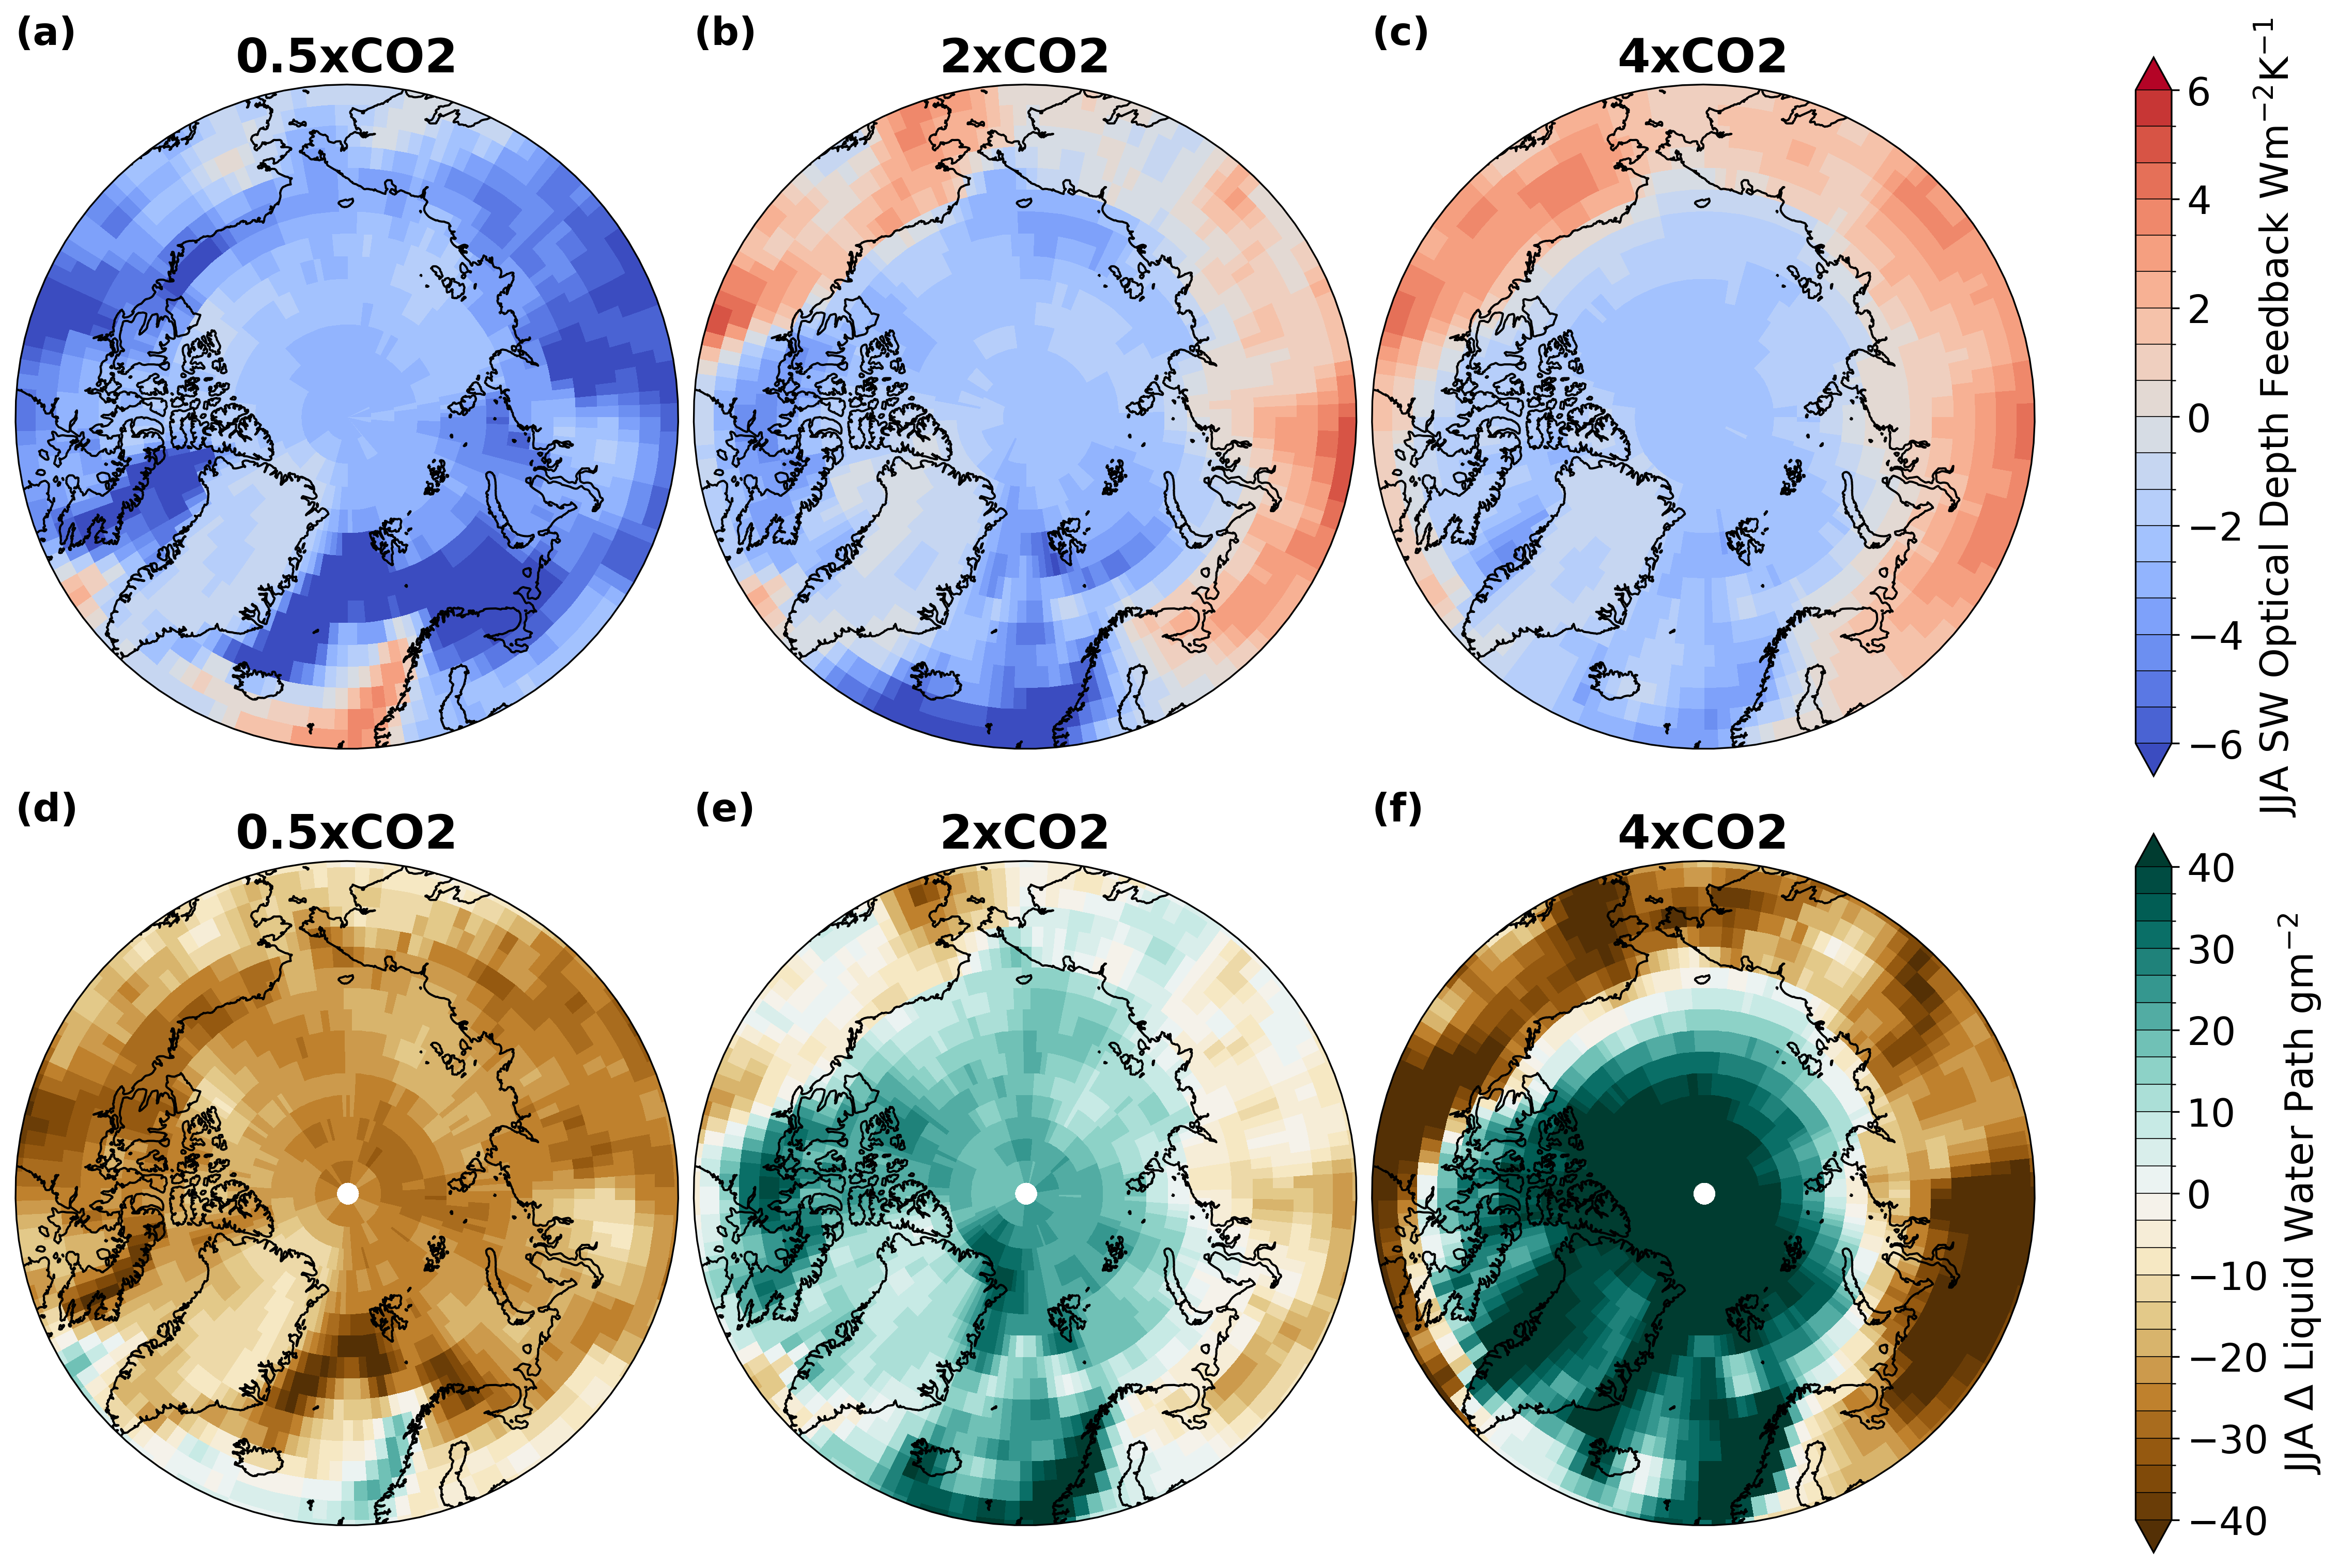

In [18]:
Arctic_limit = 60
period = 120

seasons = ['DJF','MAM','JJA','SON']
components = ['SWcld_amt', 'SWcld_tau','SWcld_tot']; component_names = ['Cloud\nAmount','Cloud\nOptical\nDepth', 'Total']

labels = [['(a)','(b)','(c)'],['(d)','(e)','(f)']]

# Choose subset of feedback variables, while selecting period of interest
var_list = []
for comp in components:
      var_list.append(ds[comp].sel(period=period)) 
feedbacks = xr.merge(var_list)

# Compute seasonal means and annual average
feedbacks_t_avg = [] # for feedbacks
cloud_t_avg = [] # for cloud cover
cloud_piClim_t_avg = [] # for pre-industrial cloud cover
temp_t_avg = [] # for temperature

feedbacks_seasons = feedbacks.groupby('time.season').mean('time')
for season in seasons:
    cloud_i = functions.computeSeasonalMean(ds_cloud.sel(period=period),season=season)
    cloud_piClim_i = functions.computeSeasonalMean(piClim_cloud,season=season)
    dT_i = functions.computeSeasonalMean(ds_dT.sel(period=period),season=season)

    feedbacks_t_avg.append(feedbacks_seasons.sel(season=season).drop_vars('season'))
    cloud_t_avg.append(cloud_i)
    cloud_piClim_t_avg.append(cloud_piClim_i)
    temp_t_avg.append(dT_i)
feedbacks_t_avg.append(feedbacks.mean('time'))
cloud_t_avg.append(ds_cloud.sel(period=period).mean('time'))
cloud_piClim_t_avg.append(piClim_cloud.mean('time'))
temp_t_avg.append(ds_dT.sel(period=period).mean('time'))

feedbacks_t_avg = xr.concat(feedbacks_t_avg,dim='time')
feedbacks_t_avg = feedbacks_t_avg.assign_coords({'time':seasons+['Annual']})

cloud_t_avg = xr.concat(cloud_t_avg,dim='time')
cloud_t_avg = cloud_t_avg.assign_coords({'time':seasons+['Annual']})

cloud_piClim_t_avg = xr.concat(cloud_piClim_t_avg,dim='time')
cloud_piClim_t_avg = cloud_piClim_t_avg.assign_coords({'time':seasons+['Annual']})

temp_t_avg = xr.concat(temp_t_avg,dim='time')
temp_t_avg = temp_t_avg.assign_coords({'time':seasons+['Annual']})

# Compute Arctic spatial averages
feedbacks_Arctic = functions.computeWeightedMean(feedbacks_t_avg.sel(lat=slice(Arctic_limit, 90)))
temp_Arctic = functions.computeWeightedMean(temp_t_avg.sel(lat=slice(Arctic_limit, 90)))

# Create figure
fig, axs = plt.subplot_mosaic(mosaic=labels, figsize=(15, 10),dpi=300,sharey=True,constrained_layout=True)
# Remove axis from map plots
for label in labels[0]+labels[1]:
      ax = axs[label]
      ax.axis('off')
# Add new subplots with Arctic map projection
ax4 = fig.add_subplot(2, 3, 1, projection=ccrs.Orthographic(0, 90))
ax5 = fig.add_subplot(2, 3, 2, projection=ccrs.Orthographic(0, 90))
ax6 = fig.add_subplot(2, 3, 3, projection=ccrs.Orthographic(0, 90))
ax7 = fig.add_subplot(2, 3, 4, projection=ccrs.Orthographic(0, 90))
ax8 = fig.add_subplot(2, 3, 5, projection=ccrs.Orthographic(0, 90))
ax9 = fig.add_subplot(2, 3, 6, projection=ccrs.Orthographic(0, 90))


# Row 2: spatial distribution of cloud optical depth feedback
levels=np.linspace(-6, 6, 19)
for ax,co2_conc in zip([ax4, ax5, ax6], ['0.5xCO2', '2xCO2', '4xCO2']):
    functions.polarCentral_set_latlim([60,90], ax)
    data = feedbacks_t_avg['SWcld_tau'].sel(time='JJA', co2_conc=co2_conc)
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='coolwarm', levels=levels,
                                        add_colorbar=False)
    ax.set_title(co2_conc, fontsize=22,fontweight='bold')
    ax.coastlines()

cax,kw = mpl.colorbar.make_axes([ax for ax in [ax4,ax5,ax6]])
cb = plt.colorbar(map, cax=cax, **kw, ticks=[-6,-4,-2,0,2,4,6],drawedges=True)
cb.set_label(label='JJA SW Optical Depth Feedback Wm$^{-2}$K$^{-1}$',fontsize=18)
cb.ax.tick_params(labelsize=18)

# Row 3: spatial distribution of LWP change
levels=np.linspace(-40,40,25)
for ax,co2_conc in zip([ax7, ax8, ax9], ['0.5xCO2', '2xCO2', '4xCO2']):
    functions.polarCentral_set_latlim([60,90], ax)
    data = cloud_t_avg['TGCLDLWP'].sel(time='JJA',co2_conc=co2_conc) - cloud_piClim_t_avg['TGCLDLWP'].sel(time='JJA') # Get LWP change from pre-industrial climate
    data = data*1000 # Convert kg/m2 to g/m2
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='BrBG',levels=levels,
                                        add_colorbar=False)
    ax.set_title(co2_conc, fontsize=22,fontweight='bold')
    ax.coastlines()
cax,kw = mpl.colorbar.make_axes([ax for ax in [ax7,ax8,ax9]])
cb = plt.colorbar(map, cax=cax, **kw,ticks=[-40,-30,-20,-10,0,10,20,30,40], drawedges=True)
cb.set_label(label='JJA $\Delta$ Liquid Water Path gm$^{-2}$',fontsize=18)
cb.ax.tick_params(labelsize=18)

# Label subplots
for label, ax in axs.items():
    ax.set_title(label, loc='left', fontsize=18,fontweight='bold')

fig.savefig('/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/arctic-cloud-feedbacks/article_figs/FigA1.png')